In [65]:
import sys
sys.path.append('..')

import torch
import numpy as np

from IPython import display
import matplotlib
import matplotlib.pyplot as plt

from diffusion_policy.env.pusht.pusht_env import PushTEnv
from diffusion_policy.env.pusht.pusht_image_env import PushTImageEnv

import gym
from gym import spaces

import collections
import numpy as np
import pygame
import pymunk
import pymunk.pygame_util
from pymunk.vec2d import Vec2d
import shapely.geometry as sg
import cv2
import skimage.transform as st
from diffusion_policy.env.pusht.pymunk_override import DrawOptions

In [66]:
class PushHEnv(PushTEnv):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def add_tee(self, position, angle, scale=30, color='LightSlateGray', mask=pymunk.ShapeFilter.ALL_MASKS()):
        mass = 1
        length = 4
        vertices1 = [(-length*scale/2, scale),
                                 ( length*scale/2, scale),
                                 ( length*scale/2, 0),
                                 (-length*scale/2, 0)]
        inertia1 = pymunk.moment_for_poly(mass, vertices=vertices1)
        vertices2 = [(-scale/2, scale),
                                 (-scale/2, length*scale * 0.75),
                                 ( scale/2, length*scale * 0.75),
                                 ( scale/2, scale)]
        inertia2 = pymunk.moment_for_poly(mass, vertices=vertices2)

        vertices3 = [(-length*scale/2, scale * length),
                                 (-length*scale/2, length*scale * 0.75),
                                 ( length*scale/2, length*scale * 0.75),
                                 ( length*scale/2, scale * length)]
        inertia3 = pymunk.moment_for_poly(mass, vertices=vertices3)
        
        body = pymunk.Body(mass, inertia1 + inertia2 + inertia3)
        shape1 = pymunk.Poly(body, vertices1)
        shape2 = pymunk.Poly(body, vertices2)
        shape3 = pymunk.Poly(body, vertices3)
        shape1.color = pygame.Color('LightSlateGray')
        shape2.color = pygame.Color('LightSlateBlue')
        shape3.color = pygame.Color('blue')
        shape1.filter = pymunk.ShapeFilter(mask=mask)
        shape2.filter = pymunk.ShapeFilter(mask=mask)
        shape3.filter = pymunk.ShapeFilter(mask=mask)
        body.center_of_gravity = (shape1.center_of_gravity + shape2.center_of_gravity + shape3.center_of_gravity) / 3
        body.position = position
        body.angle = angle
        body.friction = 1
        self.space.add(body, shape1, shape2, shape3)
        return body

In [67]:
env = PushHEnv()
# env = PushTEnv()

KeyboardInterrupt: 

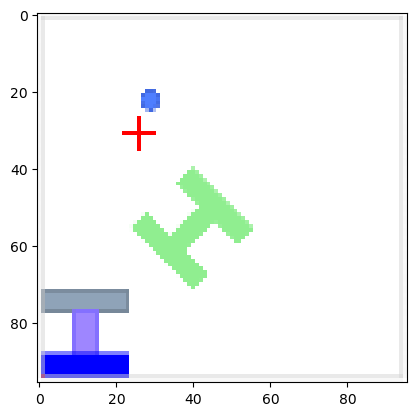

In [68]:
mode='rgb_array'

# observation, _ = env.reset()
observation = env.reset()
img = plt.imshow(env.render(mode))
episode_reward = 0
episode_steps = 0
done = False
while not done:
    img.set_data(env.render(mode))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()

    next_observation, reward, terminated, info = env.step(action)
    episode_reward += reward

    done = terminated
    episode_steps += 1
    observation = next_observation
print(episode_reward)